# Exercise
Fitting a simple linear function using pytorch automatic differentiation

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import random

# Generate synthetic data

w_true=tensor([ 2.0000, -3.4000]) b_true=4.2


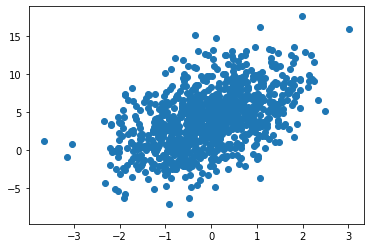

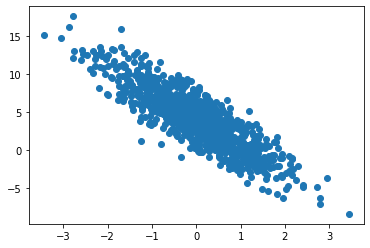

In [4]:
# Generate data
w_true = torch.tensor([2,-3.4])
b_true = 4.2
# w_true = np.array([2, -3.4])
# b_true = 4.2

print(f'{w_true=} {b_true=}')

num_examples = 1000
X = torch.normal(0,1,(num_examples, len(w_true)))
noise = torch.normal(0,0.01, (num_examples,))
y = torch.matmul(X , w_true) + b_true + noise

plt.scatter(X[:,0], y)
plt.show()
plt.scatter(X[:,1], y)
plt.show()

features = X
labels = y

# Define dataset iterator

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

for X, y in data_iter(10, features, labels):
    print(X.shape, '\n', y.shape)
    print(X, '\n', y)
    break

torch.Size([10, 2]) 
 torch.Size([10])
tensor([[ 0.3890, -0.8608],
        [ 0.5169,  1.4660],
        [ 0.7461, -1.2373],
        [-0.6310, -0.8479],
        [ 0.1570, -0.0090],
        [-1.8212, -0.4537],
        [-1.5933,  1.0340],
        [ 0.1128, -0.7153],
        [ 0.9769,  0.2290],
        [ 1.6495,  0.2897]]) 
 tensor([ 7.8846,  0.2549,  9.9020,  5.8249,  4.5359,  2.0973, -2.4924,  6.8516,
         5.3855,  6.5058])


# Define the model, loss & optimizer

In [6]:
def model(X, w, b):
    return torch.matmul(X, w) + b

def loss(y_hat, y_true):
    return (y_hat - y_true.reshape(y_hat.shape)) ** 2 / 2

def optimizer(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= param.grad * lr / batch_size
            param.grad.zero_()

# Fit model

epoch=0 loss=12.787
epoch=1 loss=10.621
epoch=2 loss=8.823
epoch=3 loss=7.331
epoch=4 loss=6.092
epoch=5 loss=5.063
epoch=6 loss=4.209
epoch=7 loss=3.499
epoch=8 loss=2.910
epoch=9 loss=2.420
epoch=10 loss=2.013
epoch=11 loss=1.675
epoch=12 loss=1.394
epoch=13 loss=1.160
epoch=14 loss=0.965
epoch=15 loss=0.804
epoch=16 loss=0.669
epoch=17 loss=0.557
epoch=18 loss=0.464
epoch=19 loss=0.386
epoch=20 loss=0.322
epoch=21 loss=0.268
epoch=22 loss=0.223
epoch=23 loss=0.186
epoch=24 loss=0.155
epoch=25 loss=0.129
epoch=26 loss=0.108
epoch=27 loss=0.090
epoch=28 loss=0.075
epoch=29 loss=0.063
epoch=30 loss=0.052
epoch=31 loss=0.044
epoch=32 loss=0.036
epoch=33 loss=0.030
epoch=34 loss=0.025
epoch=35 loss=0.021
epoch=36 loss=0.018
epoch=37 loss=0.015
epoch=38 loss=0.012
epoch=39 loss=0.010
epoch=40 loss=0.009
epoch=41 loss=0.007
epoch=42 loss=0.006
epoch=43 loss=0.005
epoch=44 loss=0.004
epoch=45 loss=0.004
epoch=46 loss=0.003
epoch=47 loss=0.002
epoch=48 loss=0.002
epoch=49 loss=0.002
epoch=50

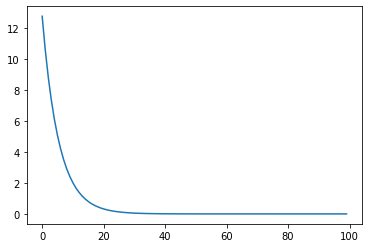

In [7]:
EPOCHS = 100
LR = 0.001
BATCH_SZ = 10

weights = torch.normal(0, 0.01,size=(2,1), requires_grad=True)
bias = torch.zeros(1, requires_grad=True)

# Epoch loop
history = []
for epoch in range(EPOCHS):

    # Minibatch loop
    for X, label in data_iter(BATCH_SZ, features, labels):
        y_hat = model(X, weights, bias)
        l = loss(y_hat, label)
        l.sum().backward()
        optimizer([weights, bias], LR, BATCH_SZ)

    # Epoch end, compute stats for all samples in the dataset
    with torch.no_grad():
        y_hat = model(features, weights, bias)
        l = loss(y_hat, labels)
        history.append(l.mean())
        print(f'{epoch=} loss={l.mean():.3f}')

plt.plot(history)
plt.show()

# Compare results

In [8]:
print("=== Weights ===")
print(f'{w_true}\n{weights.reshape(w_true.shape)}')
print("=== Bias ===")
print(f'{b_true}\n{bias.detach().numpy()}')

=== Weights ===
tensor([ 2.0000, -3.4000])
tensor([ 1.9993, -3.3994], grad_fn=<ReshapeAliasBackward0>)
=== Bias ===
4.2
[4.2000484]
